In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

We will be solving the 1D advection equation using interpolating semi-lagrange techniques

The boundary conditions are periodic.

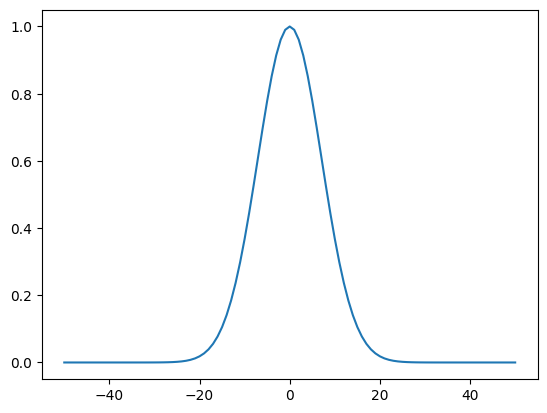

In [2]:
x_coordinates = np.array([x for x in range(-50, 51)])
initial_distribution = np.exp(-(x_coordinates/10)**2)

plt.plot(x_coordinates, initial_distribution)
plt.show()

In [12]:
grid = np.zeros((1000, len(x_coordinates))) # rows are time steps, columns are x coordinates
grid[0, :] = initial_distribution

In [13]:
# Parameters
dt = 1
v = 1.23 # advection speed

In [14]:
first_step_distribution = np.exp(-((x_coordinates - v*dt)/10)**2)
grid[1, :] = first_step_distribution

In [15]:
# Starting point problem solver, gives us the value of x backtracing for dt timesteps, aka alpha
def starting_point(v, dt):
    return float(v*dt)

# Interpolator, takes in x and u at nearest gridpoints and returns u at x
def interp(x, floor_u, ceil_u):
    ceil_x = math.ceil(x)
    return (floor_u*(ceil_x - x) + ceil_u*(1 + x - ceil_x))

# Semi-Lagrangian interpolation, gives us the value of x at the starting point for the next timestep
def semi_lagrange_interp(timestep, grid_array, alpha):
    grid_array[timestep + 1, :] = [interp(x - 2*alpha, grid_array[timestep - 1, math.floor(x - 2*alpha)], grid_array[timestep - 1, math.ceil(x - 2*alpha)]) for x in range(len(grid_array[0]))]

In [16]:
alpha = starting_point(v, dt)
for t in range(1, len(grid) - 1):
    semi_lagrange_interp(t, grid, alpha)
# plt.imshow(grid, aspect='auto', cmap='viridis')
# plt.show()

In [17]:
from video_creator import create_video

create_video(grid, '1D_advection_std_SL.mp4')
